# Exploratory Data Analysis - Global Terrorism

   ● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

   ● As a security/defense analyst, try to find out the hot zone of terrorism.
      
   ● What all security issues and insights you can derive by EDA?

# Task - 4 The Spark Foundation

 * #GRIPFEBRUARY23

# Author: Kiran Kumari

**Dataset: https://bit.ly/2TK5Xn5**

**Importing all the libraries required for analysis**

In [ ]:
import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

**Importing Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Global Terrorism - START data.zip",encoding='latin1')
print("Data has been sucessfully imported")
data.head()


Data has been sucessfully imported


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(181691, 135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
for i in data.columns:
  print(i,end=",")



eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [ ]:
#Rename the columns

data.rename(columns={'eventid':''EventId'','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','success':'Success','suicide':'Suicide','provstate':'State','propvalue':'PropValue','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

In [ ]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualities"]=data["Killed"]+data["Wounded"]

In [ ]:
#filtering out the importanat data in whole dataset those I am using furture processing

data=data[['EventId','Year','Month','Day','Country','State','Region','city','Success','Suicide','PropValue','longitude','latitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_Type','Weapon_Type','Motive','Casualities']]

In [ ]:
data.head()

,EventId,Year,Month,Day,Country,State,Region,city,Success,Suicide,...,AttackType,Killed,Wounded,Target,Summary,Group,Target_Type,Weapon_Type,Motive,Casualities
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1,0,...,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,1,0,...,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1,0,...,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,1,0,...,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,1,0,...,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [ ]:
data.shape

(181691, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   EventId      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   Success      181691 non-null  int64  
 9   Suicide      181691 non-null  int64  
 10  PropValue    38989 non-null   float64
 11  longitude    177134 non-null  float64
 12  latitude     177135 non-null  float64
 13  AttackType   181691 non-null  object 
 14  Killed       181691 non-null  float64
 15  Wounded      181691 non-null  float64
 16  Target       181055 non-null  object 
 17  Summary      115562 non-null  object 
 18  Group        181691 non-

In [ ]:
#missing value
data.isnull().sum()

EventId             0
Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
Success             0
Suicide             0
PropValue      142702
longitude        4557
latitude         4556
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_Type         0
Weapon_Type         0
Motive         131130
Casualities         0
dtype: int64

In [ ]:
data.describe()

,EventId,Year,Month,Day,Success,Suicide,PropValue,longitude,latitude,Killed,Wounded,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,3.898900e+04,1.771340e+05,177135.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.889598,0.036507,2.088119e+05,-4.586957e+02,23.498343,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,0.313391,0.187549,1.552463e+07,2.047790e+05,18.569242,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,-8.618590e+07,-53.154613,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,1.000000,0.000000,-9.900000e+01,4.545640e+00,11.510046,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,1.000000,0.000000,-9.900000e+01,4.324651e+01,31.467463,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,1.000000,0.000000,1.000000e+03,6.871033e+01,34.685087,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,2.700000e+09,1.793667e+02,74.633553,1570.000000,8191.000000,9574.000000


In [ ]:
# Total number of people casualities in terror attack
CasualitiesData = data.loc[:,"Casualities"]
print("Total number of Casualities due to Terrist attack from 1970 to 2017 across the world :", int(sum(CasualitiesData.dropna())))

Total number of Casualities due to Terrist attack from 1970 to 2017 across the world : 935737


In [ ]:
# Total number of people killed in terror attack
KillData = data.loc[:,"Killed"]
print("Total number of people killed due to Terrist attack from 1970 to 2017 across the world:",int(sum(KillData.dropna())))

Total number of people killed due to Terrist attack from 1970 to 2017 across the world: 411868


In [ ]:
# Total Number of people wonded in terror attack
WoundedData = data.loc[:,"Wounded"]
print("Total number of people wounded due to terror attack from 1970 to 2017 acroos the world:", int(sum(WoundedData.dropna())))

Total number of people wounded due to terror attack from 1970 to 2017 acroos the world: 523869


In [ ]:
# AttackData
AttackData = data.loc[:,"AttackType"]
typeKillData = pd.concat([AttackData,KillData],axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType' , values="Killed", aggfunc="sum")
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
#CountryData
CountryData = data.loc[:,'Country']
CountryKillData = pd.concat([CountryData,KillData],axis=1)
CountryKillFormatData = CountryKillData.pivot_table(columns="Country", values="Killed",aggfunc="sum")
CountryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


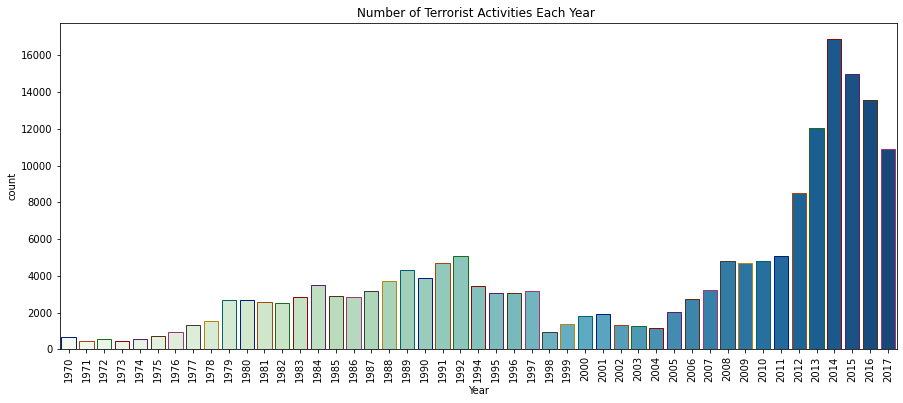

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='GnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities Each Year ")
plt.show()

# Observation

   **Most number of casualities: 85618 in 2014**
   
   **Least number of casualities: 255 in 1971**

# Country Wise Attacks [Top 15]

**Number of Total Attack in Each Country**

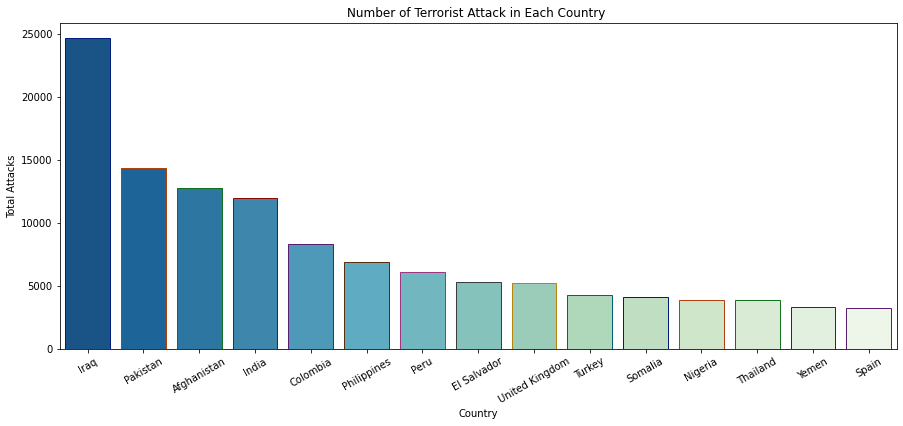

In [ ]:
plt.subplots(figsize=(15,6))
Country_attacks = data['Country'].value_counts()[:15].reset_index()
Country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=Country_attacks.Country, y=Country_attacks['Total Attacks'],palette='GnBu_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title("Number of Terrorist Attack in Each Country ")
plt.show()


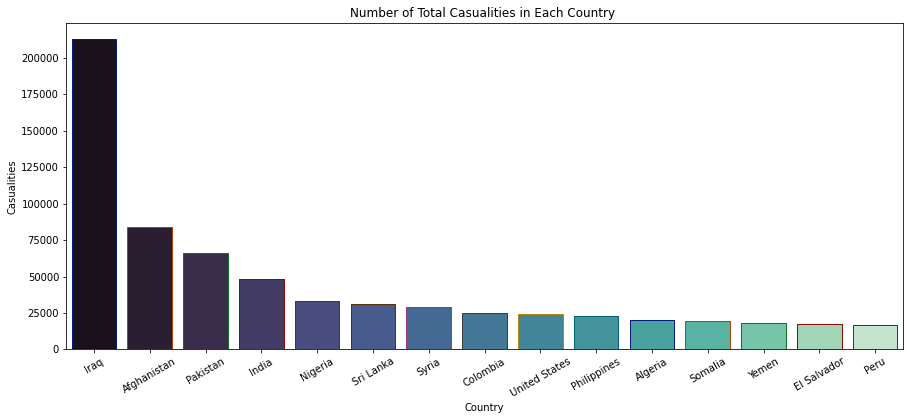

In [ ]:
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities',ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities,palette= 'mako',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title("Number of Total Casualities in Each Country ")
plt.show()


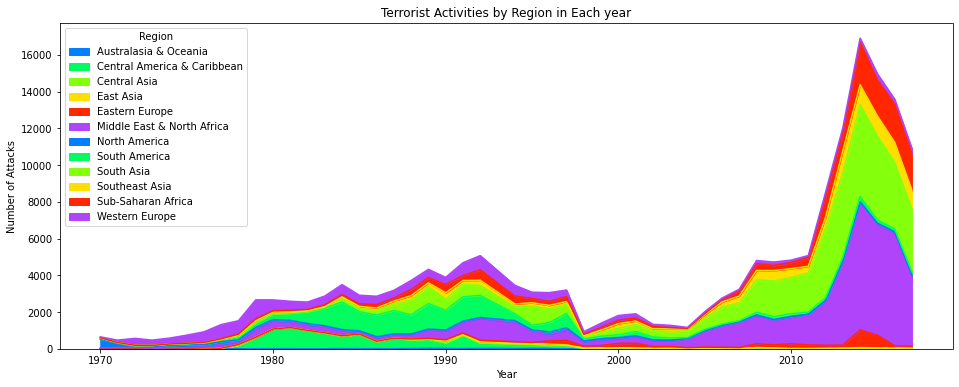

In [ ]:
pd.crosstab(data['Year'],data['Region']).plot(kind='area',figsize=(16,6),color=sns.color_palette('gist_ncar'))
plt.title('Terrorist Activities by Region in Each year')
plt.ylabel('Number of Attacks')
plt.show()

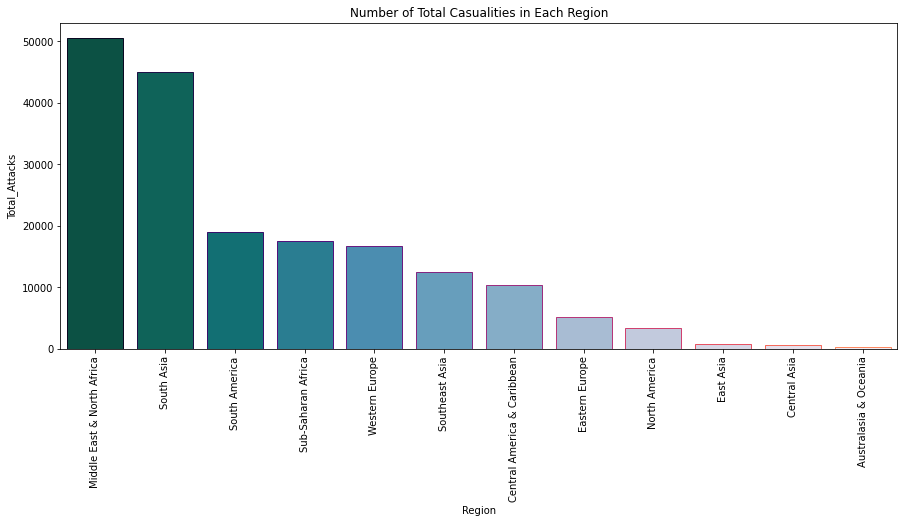

In [ ]:
Region_attacks = data.Region.value_counts().to_frame().reset_index() 
Region_attacks.columns = ['Region','Total_Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=Region_attacks.Region, y = Region_attacks['Total_Attacks'],palette='PuBuGn_r',edgecolor=sns.color_palette('magma',15))
plt.xticks(rotation=90)
plt.title("Number of Total Casualities in Each Region")
plt.show()



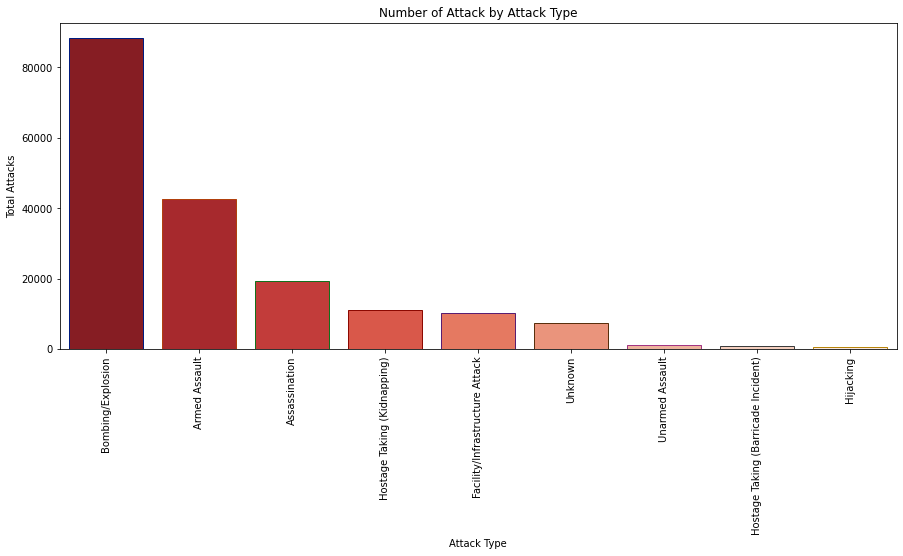

In [ ]:
attack_type = data.AttackType.value_counts().to_frame().reset_index() 
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'],palette='Reds_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title("Number of Attack by Attack Type")
plt.show()

# 5. Number Of Total Attacks and Casualities by city [Top20]

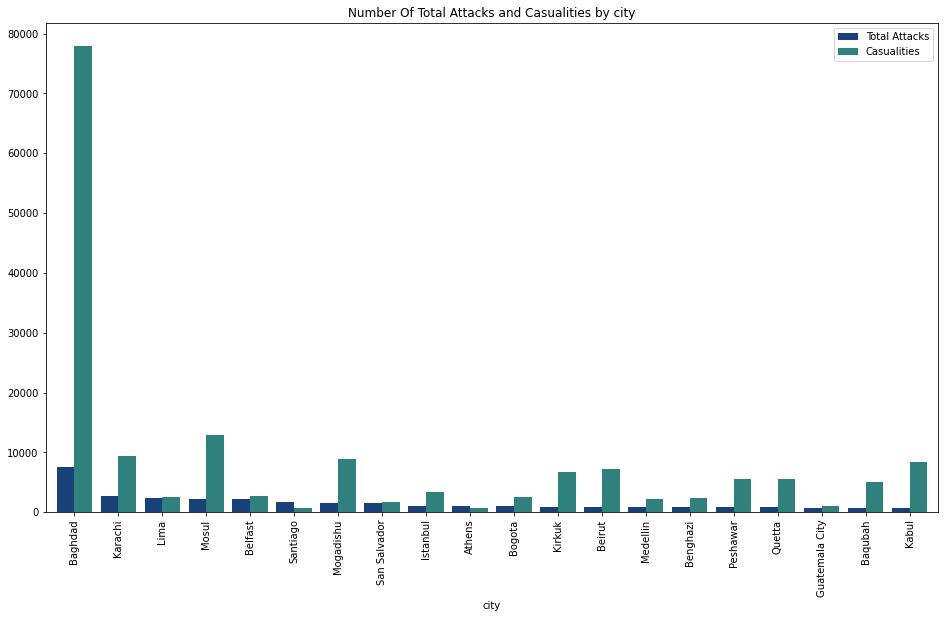

In [ ]:
city_attacks = data.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['city', 'Total Attacks']
city_cas = data.groupby('city').Casualities.sum().to_frame().reset_index()
city_cas.columns = ['city', 'Casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]
sns.set_palette('gist_earth')
city_tot.plot.bar(x='city', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by city')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

# 6. Number Of Total Attacks by Terrorist Group [Top 16]

In [ ]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks


,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


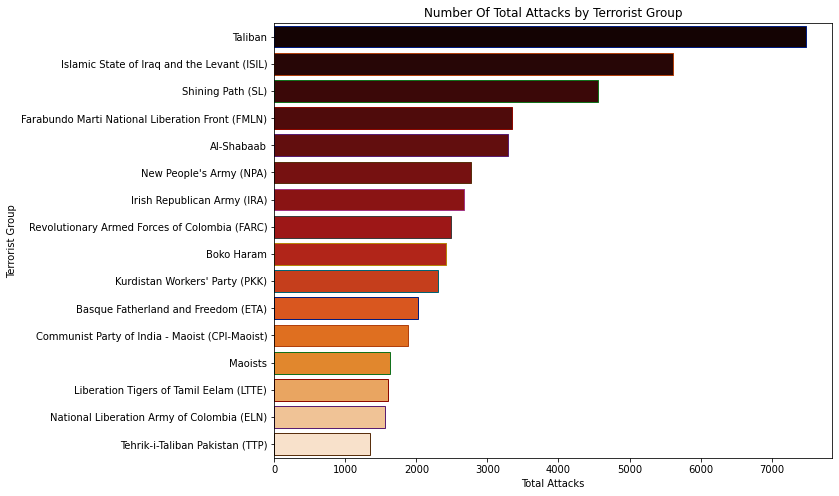

In [ ]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='gist_heat',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

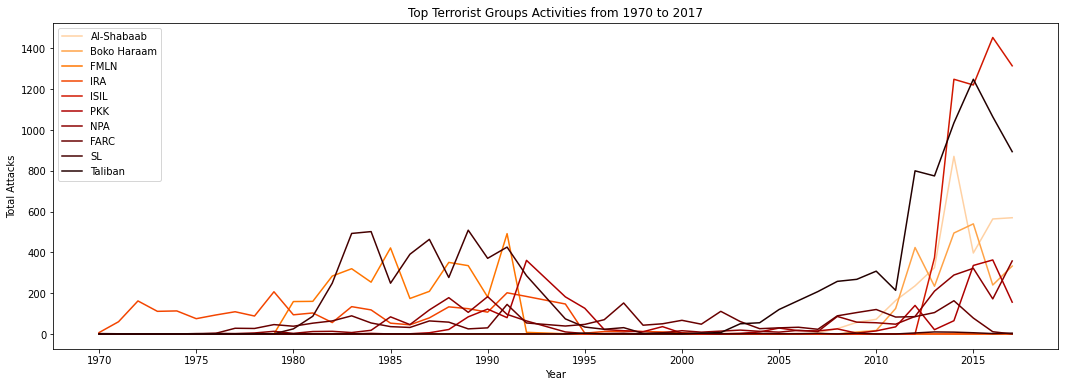

In [ ]:
groups_10 = data[data.Group.isin(data.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('gist_heat_r', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

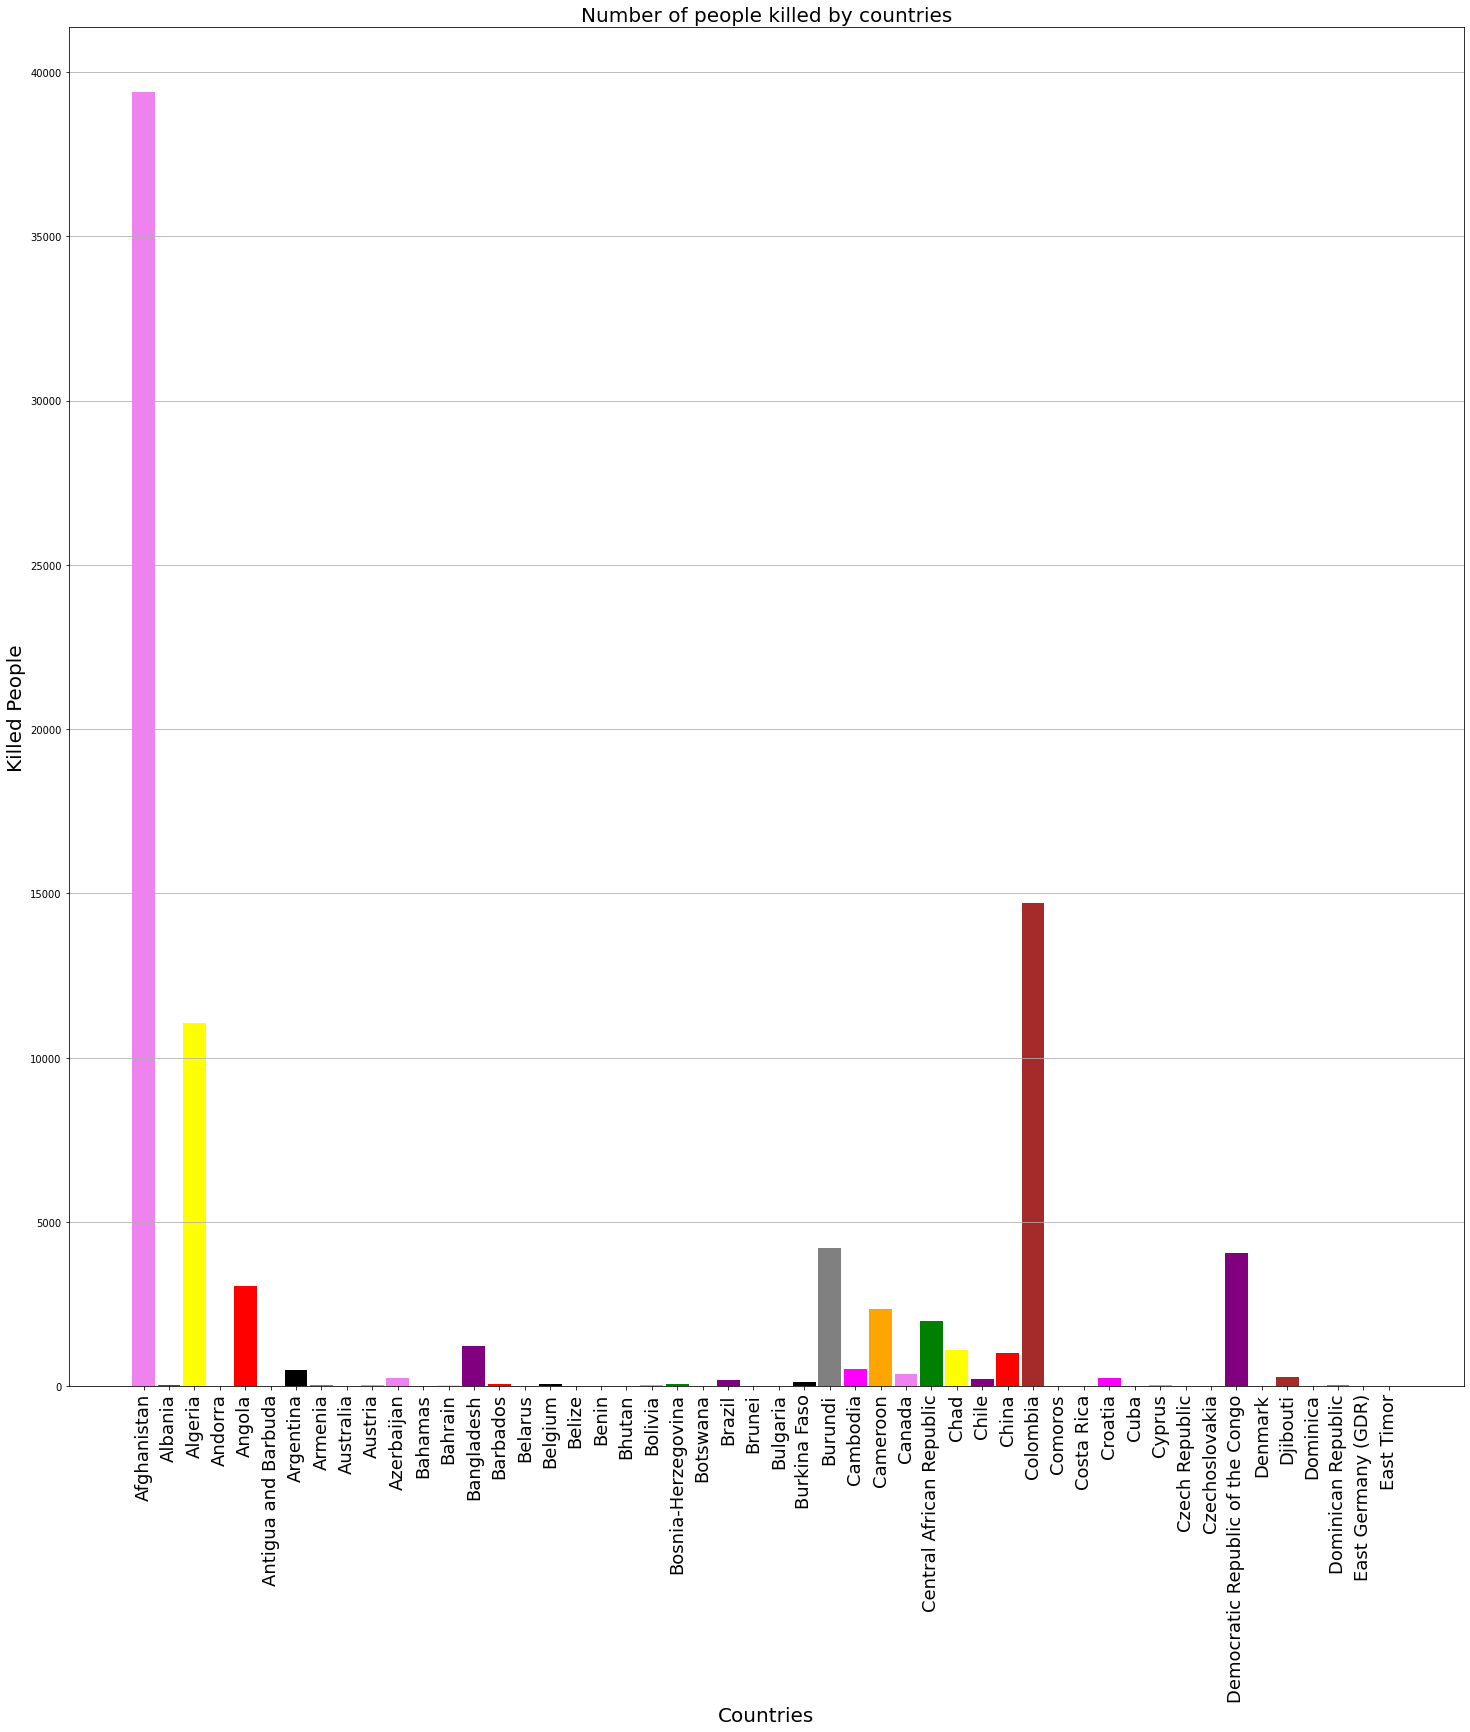

In [ ]:
labels = CountryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = CountryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['violet', 'green', 'yellow', 'purple', 'red', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

In [ ]:
data.to_csv('New_terrorism_data.csv')

In [ ]:
pwd

'/content'